# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane 1
* automobile 2
* bird 3
* cat 4
* deer 5
* dog 6
* frog 7
* horse 8
* ship 9
* truck 10

* Total 10 classes (Aras changed above/this section a bit)

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


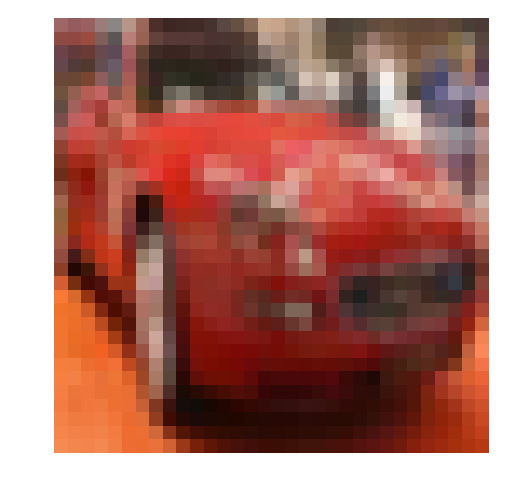

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    ## image data shape = [t, i,j,k], t= num_img_per_batch (basically the list of images), i,j,k=height,width, and depth/channel
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
# import helper ## I did this because sklearn.preprocessing was defined in there
from sklearn import preprocessing  ## from sklearn lib import preprocessing lib/sublib/functionality/class

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function

    ## This was in the helper.py which belongs to the generic helper functions
    #     def display_image_predictions(features, labels, predictions):
    #     n_classes = 10
    #     label_names = _load_label_names()
    #     label_binarizer = LabelBinarizer()
    #     label_binarizer.fit(range(n_classes))
    #     label_ids = label_binarizer.inverse_transform(np.array(labels))
    label_binarizer = preprocessing.LabelBinarizer() ## instantiate and initialized the one-hot encoder from class to one-hot
    n_class = 10 ## total num_classes
    label_binarizer.fit(range(n_class)) ## fit the one-vec to the range of number of classes, 10 in this case (dataset)
    return label_binarizer.transform(x) ## transform the class labels to one-hot vec


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

If you're finding it hard to dedicate enough time for this course a week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) to build each layer, except "Convolutional & Max Pooling" layer.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

If you would like to get the most of this course, try to solve all the problems without TF Layers.  Let's begin!
### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [89]:
import tensorflow as tf

def nn_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    ## name the placeholder?? why should I do that? I can return it directly like below
    ## It is also worth mentioning that the overal image_shape = [i,j,k] meaning row, col, channels/depth or 
    ## i, j, k
    ## h, w, depth (deep-wide learning)
    ## r, c, channels
    ## y, x, z
    ## Data_structure AKA data_shape are usually defined dshape = [i, j, k] as a tensor/Mat/Vec or even a scalar
    ## This is kind of tricky: image_shape is probablly pointing at the img_hight, img_width, and image_depth as well
    ## x_tensor is probably the input image or images or input batch
    return tf.placeholder(dtype=tf.float32, 
                          shape=[None, image_shape[0], image_shape[1], image_shape[2]], 
                          name=None)

def nn_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    ## tf.placehoolder(data_type, data_structure (data_shape))
    return tf.placeholder(dtype=tf.int32, shape=[None, n_classes], name=None) ## the t/batch_size/num_img_per_batch = None & n/num_dimension = n_classes

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
# tests.test_nn_image_inputs(nn_image_input)
# tests.test_nn_label_inputs(nn_label_input)

### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

Note: You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.  You're free to use any TensorFlow package for all the other layers.

In [90]:
# This is the new function for implementing the backprop in convnets.
def conv2d_relu(x_tensor, conv_num_outputs, conv_ksize, conv_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    k = x_tensor.get_shape()[3:4].num_elements() ## there shoudl be a simpler way!! num_elements/length
    w_shape = [conv_ksize[0], conv_ksize[1], k, conv_num_outputs] # conv_num_output 1D tuple or a scalar
    
    # kernel size=k_hxw and number of hidden units==H_1xh
    w_kxh = tf.Variable(tf.truncated_normal(shape=w_shape, mean=0.0, stddev=0.1, dtype=tf.float32, 
                                            seed=None, name=None))
    # convolution stride/steps per scan/convolution
    strides = [1, conv_strides[0], conv_strides[1], 1] # t == batch/num_data-img-images, i=hight/row/y, j=width/x/col, k=depth is usually 1
    
    # The convolution output result and the input to the hidden layer units==hin_kcxh.
    # kc: kernel convolved meaning that input dimension convolved with k is n-k+1/h-k+1==kc
    hin_kcxh = tf.nn.conv2d(input=x_tensor, filter=w_kxh, strides=strides, padding='VALID', use_cudnn_on_gpu=None,
                              data_format=None, name=None) ## apply convolution, None==Dynamic and NOT static memory

    # Let's create biases
    b_1xh = tf.Variable(tf.truncated_normal(shape=[conv_num_outputs], mean=0.0, stddev=0.1, dtype=tf.float32, 
                                        seed=None, name=None)) # b_1xh
    hin_kcxh += b_1xh
    
    # Passing hin_kcxh to the activation function, i.e. ReLU in this case.
    # adding relu function/activate function and the output is the h_tensor hidden layer output
    hout_kcxh = tf.nn.relu(hin_kcxh, name=None) ## apply non-linearity, i.e. ReLU function
    
    # return the hidden layer output, biases, and weights
    # For hidden layer output is convolved with ksized-kernel-> kc==kernel-convolved
    return w_kxh, b_1xh, hout_kcxh

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

In [91]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    # x_tensor shape = [batch, img_w, img_height, img_depth] = [t, n] = mat_txn, t==batch, n=hxwxd
    # img_flat = img_w * img_h * img_d
    n_size = x_tensor.get_shape()[1:4].num_elements() #1,2,3
    
    # The actual flattening and reshaping procedure from hout_kcxh to hout_1xkch
    # kch== kc*h, kc==kernel-convolved/n-k+1, and h==number of hidden units h in hiddel layer H
    hout_1xkch = tf.reshape(tensor=x_tensor, shape=[-1, n_size], name=None)
    
    # returning the reshaped/flat/vectorized hout/output tensor from hidden layer H
    return hout_1xkch

### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). You can use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for this layer.

Note: Activation, softmax, or cross entropy shouldn't be applied to this.

In [92]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    ## The only differemce between this layer and the previous fully connected layer is the softmax for classification.
    ## Instead of ReLU, softmax should be used.
    n_size = x_tensor.get_shape()[1:2].num_elements() ## to get the num_features
    
    ## Let's assign w and b for wx+b
    w_hxm = tf.Variable(tf.truncated_normal(shape=[n_size, num_outputs], mean=0.0, stddev=0.1, 
                                        dtype=tf.float32, seed=None, name=None))
    
    # biases for the ouput Layer or O_1xm is b_1xm
    b_1xm = tf.Variable(tf.truncated_normal(shape=[num_outputs], mean=0.0, stddev=0.1, 
                                        dtype=tf.float32, seed=None, name=None))

    # The actual matrix multiplication or yin_1xm==logits before entering the logistic function/sigmoid/softmax function
    # These activation functions are used for classification purposes.
    y_1xm_logits = tf.matmul(x_tensor, w_hxm) + b_1xm
    
    #return tf.nn.softmax(y_tensor_in) 
    # The softmax function/tf.softmax() is NOTused since the cross entropy softmax will be applied instead for cost measurement.
    # That is why only logits wx+b is needed for this layer.
    return w_hxm, b_1xm, y_1xm_logits

### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [93]:
# This is feed forward/ forward propagation
def conv_net(x):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution layers
    w_kxh, b_1xh, hout_kcxh = conv2d_relu(x_tensor=x_1xijk, conv_num_outputs=10, conv_ksize=[3, 3], conv_strides=[1, 1])

    # TODO: Apply a Flatten Layer for FC/ Full Connections
    hout_1xkch = flatten(x_tensor=hout_kcxh) #kch==kc*h for flattening the tensor/matrix to a vector

    # TODO: Apply an Output Layer
    w_hxm, b_1xm, y_1xm_logits = output(x_tensor=hout_1xkch, num_outputs=10)
    
    # TODO: return output
    # returning the conv net parames in order
    return w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits

In [94]:
##############################
## Build the Neural Network ##
##############################

# Feed forward
# def feedforward(): # Future work
    
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x_1xijk = nn_image_input(image_shape=(32, 32, 3)) # i=32, j=32, k=3, n=i*j*k
y_1xm_labels = nn_label_input(n_classes=10) # num_output_classes=10, m=10

# Model
# logits = conv_net(x=x)
w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits = conv_net(x=x_1xijk)

# Name logits Tensor, so that is can be loaded from disk after training
y_1xm_logits = tf.identity(y_1xm_logits, name='y_1xm_logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_1xm_logits, labels=y_1xm_labels))

In [96]:
# ## Testing and debugging the conv2d_relu function
# # Inputs
# # (height, width, depth) = (32, 32, 3)
# x_1xijk = nn_image_input(image_shape=(32, 32, 3)) # i=32, j=32, k=3, n=i*j*k # depth==channels==RGB
# y_1xm = nn_label_input(n_classes=10) # num_output_classes=10, m=10

# # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
# w_kxh, b_1xh, hout_kcxh = conv2d_relu(x_tensor=x_1xijk, conv_num_outputs=10, conv_ksize=[3, 3], conv_strides=[1, 1])
# w_kxh, b_1xh, hout_kcxh

# hout_1xkch = flatten(x_tensor=hout_kcxh)
# # N, H, W, C =hout_kcxh.get_shape()
# # hout_kcxh, hout_1xkch, N, H, W, C
# # h = hout_kcxh.get_shape()[1:2].num_elements()
# # w = hout_kcxh.get_shape()[2:3].num_elements()
# # c = hout_kcxh.get_shape()[3:4].num_elements()
# # h, w, c
# # tf.reshape(hout_1xkch, shape=[-1, h, w, c], name=None)
# # # shape[3].num_element()
# # # tf.reshape(tensorhout_kcxh)

# w_hxm, b_1xm, y_1xm_logits = output(x_tensor=hout_1xkch, num_outputs=10)
# w_hxm, b_1xm, y_1xm_logits

# w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits = conv_net(x=x_1xijk)
# w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits

# # # # In this section, I try to implement backprop using SGD. 
# # ## This is an optimizer for minimizing the cost and training the conv_net.
# # ## Output layer error
# # #softmax = exp(logits) / reduce_sum(exp(logits), dim)
# # fy_1xm = tf.nn.softmax(logits=y_1xm_logits, dim=-1, name=None) # logits needed
# # df_1xm = fy_1xm * (1-fy_1xm) # fy_1xm??  -- how come can they be multiplied?
# # # db_1xm = cost_1xm * df_1xm # The same question applies to this one as well?
# # err = tf.nn.softmax_cross_entropy_with_logits(logits=y_1xm_logits, labels=y_1xm_labels)
# # y_1xm_logits, fy_1xm, df_1xm, cost, err
# # # db_1xm = err * df_1xm # The same question applies to this one as well?
# # m=df_1xm.get_shape()[1:2].num_elements()
# # m
# # err_1xm = tf.reshape(tensor=err, shape=[-1, m], name=None)
# # err, err_1xm

# # # In this section, I try to implement backprop using SGD. 
# ## This is an optimizer for minimizing the cost and training the conv_net.
# ## Output layer error
# #softmax = exp(logits) / reduce_sum(exp(logits), dim)
# fy_1xm = tf.nn.softmax(logits=y_1xm_logits, dim=-1, name=None) # logits needed
# df_1xm = fy_1xm * (1-fy_1xm) # fy_1xm??  -- how come can they be multiplied?

# err = tf.nn.softmax_cross_entropy_with_logits(logits=y_1xm_logits, labels=y_1xm_labels)
# m = df_1xm.get_shape()[1:2].num_elements()
# err_1xm = tf.reshape(tensor=err, shape=[-1, m], name=None)
# db_1xm = err_1xm * df_1xm # The same question applies to this one as well?

# ## FC layer between output layer and hidden layer
# # h_out_1xh is needed as the output of the convolutional layer.
# # dw_hxm=tf.matmul(db_1xm.T, hout_1xh).T # another form
# # w_hxm is also needed as the weights between hidden layer and the output layer.
# dw_hxm = tf.matmul(tf.transpose(hout_1xkch), db_1xm) # FC weights
# db_1xh = tf.matmul(db_1xm, tf.transpose(w_hxm)) # FC layer

# # Conv layer and PC/partially connected layers input and hidden
# h = hout_kcxh.get_shape()[1:2].num_elements()
# w = hout_kcxh.get_shape()[2:3].num_elements()
# c = hout_kcxh.get_shape()[3:4].num_elements()
# # db_kcxh = tf.reshape(tensor=db_1xh, shape=[-1, h, w, c], name=None) # shape it back to the original one since it had been flattened.
# db_kcxh = tf.reshape(tensor=db_1xh, shape=[-1, h, w, c], name=None) # shape it back to the original one since it had been flattened.

# ## Self implementation of conv2d_bp using rot 180
# # # Rot 180 the kernel/w and x
# # x_1xhwc = tf.squeeze(input=x_1xijk, axis=[0], name=None, squeeze_dims=None) #squeeze_dims: Deprecated keyword argument that is now axis.
# # x_1xhwc_flipped = tf.image.flip_up_down(image=x_1xhwc) # around w axis
# # x_1xhwc_flipped_180 = tf.image.flip_left_right(image=x_1xhwc_flipped) # around h axis
# # x_1xnhwc_flipped_180 = tf.expand_dims(input=x_1xhwc_flipped_180, axis=0, name=None, dim=None) # dim is deprecated and replaced by axis.
# # # dw_kxh = tf.nn.conv2d(input=x_1xnhwc_flipped_180, filter=db_kcxh, strides=[1, 1, 1, 1], padding='VALID', use_cudnn_on_gpu=None, 
# # #              data_format=None, name=None)
# # # test_conv2d_kcxh = tf.nn.conv2d(input=x_1xnhwc_flipped_180, filter=db_kcxh, strides=[1, 1, 1, 1], padding='VALID', use_cudnn_on_gpu=None,
# # #                           data_format=None, name=None) ## apply convolution, None==Dynamic and NOT static memory


# dw_kxh = tf.nn.conv2d_backprop_filter(input=x_1xijk, filter_sizes=w_kxh.get_shape(), out_backprop=db_kcxh, 
#                                       strides=[1, 1, 1, 1], padding='VALID', 
#                                       use_cudnn_on_gpu=None, data_format=None, name=None)
# # input: A Tensor. Must be one of the following types: 
# # half, float32, float64. 4-D with shape 
# # input:[batch, in_height, in_width, in_channels].
# # filter_sizes: A Tensor of type int32. An integer vector representing the tensor shape of filter, where filter is a 4-D 
# # filter size: [filter_height, filter_width, in_channels, out_channels] tensor.
# # out_backprop: A Tensor. Must have the same type as input. 4-D with shape 
# # out_bp: [batch, out_height, out_width, out_channels]. Gradients w.r.t. the output of the convolution.
# # A Tensor. Has the same type as input. 4-D with shape 
# # return: [filter_height, filter_width, in_channels, out_channels]. Gradient w.r.t. the filter input of the convolution.


    
# #     x_1xijk, x_1xhwc, x_1xhwc_flipped, x_1xhwc_flipped_180,
# err_1xm, dw_hxm, db_1xh, db_kcxh, x_1xnhwc_flipped_180, x_1xijk, test_conv2d_kcxh, w_kxh.get_shape(), w_kxh, dw_kxh, 
# b_1xh.get_shape(), db_1xh.get_shape()

In [107]:
# This is the back propagation.
def backprop(x_1xijk, w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits, y_1xm_labels):
    """Back propagation of the conv_net
    : cost_1xm: Placeholder tensor that holds the error/cost/loss with m-Dim same as the output/y_tensor_txm. 
    """
    # # In this section, I try to implement backprop using SGD. 
    ## This is an optimizer for minimizing the cost and training the conv_net.
    ## Output layer error
    #softmax = exp(logits) / reduce_sum(exp(logits), dim)
    fy_1xm = tf.nn.softmax(logits=y_1xm_logits, dim=-1, name=None) # logits needed
    df_1xm = fy_1xm * (1-fy_1xm) # fy_1xm??  -- how come can they be multiplied?
    
    err = tf.nn.softmax_cross_entropy_with_logits(logits=y_1xm_logits, labels=y_1xm_labels)
    m = df_1xm.get_shape()[1:2].num_elements()
    err_1xm = tf.reshape(tensor=err, shape=[-1, m], name=None)
    db_1xm = err_1xm * df_1xm # The same question applies to this one as well?

    ## FC layer between output layer and hidden layer
    # h_out_1xh is needed as the output of the convolutional layer.
    # dw_hxm=tf.matmul(db_1xm.T, hout_1xh).T # another form
    # w_hxm is also needed as the weights between hidden layer and the output layer.
    dw_hxm = tf.matmul(tf.transpose(hout_1xkch), db_1xm) # FC weights
    db_1xh = tf.matmul(db_1xm, tf.transpose(w_hxm)) # FC layer

    # Conv layer and PC/partially connected layers input and hidden
    h = hout_kcxh.get_shape()[1:2].num_elements()
    w = hout_kcxh.get_shape()[2:3].num_elements()
    c = hout_kcxh.get_shape()[3:4].num_elements()
    # tf.reshape(hout_1xkch, shape=[-1, h, w, c], name=None)
    #  NOTE: kernel should be transposed/not anything else
    db_kcxh = tf.reshape(tensor=db_1xh, shape=[-1, h, w, c], name=None) # shape it back to the original one since it had been flattened.
    dw_kxh = tf.nn.conv2d_backprop_filter(input=x_1xijk, filter_sizes=w_kxh.get_shape(), out_backprop=db_kcxh, 
                                      strides=[1, 1, 1, 1], padding='VALID', 
                                      use_cudnn_on_gpu=None, data_format=None, name=None)


    # Passing hin_kcxh to the activation function, i.e. ReLU in this case.
    # adding relu function/activate function and the output is the h_tensor hidden layer output
    # ReLU derivative == ReLU == max(0,1)
    dw_kxh = tf.nn.relu(dw_kxh, name=None) ## apply non-linearity, i.e. ReLU function

    learn_rate=0.01
    w_kxh += learn_rate * dw_kxh
    b_1xh += learn_rate * db_kcxh
    w_hxm += learn_rate * dw_hxm
    b_1xm +=  learn_rate * db_1xm
    
    # When there is no returning/return value, pass is the option.
    pass

In [113]:
##############################
## Train NN ##
##############################
# optimizer = backprop(x_1xijk, w_kxh, b_1xh, hout_kcxh, hout_1xkch, w_hxm, b_1xm, y_1xm_logits, y_1xm_labels)
optimizer = tf.train.AdamOptimizer().minimize(cost)


# Accuracy
correct_pred = tf.equal(tf.argmax(y_1xm_logits, 1), tf.argmax(y_1xm_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [114]:
def train_neural_network(session, optimizer, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    # Feed the dictionary (x, y, dropout_prob) from Numpy (Python) into TensorFlow (Tensors)
    feed_dict_train = {x_1xijk:feature_batch, y_1xm_labels:label_batch}

    # Run the optimizer on the fed training dict (TF training data).
    session.run(optimizer, feed_dict=feed_dict_train)
    
    pass

### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [115]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    ## Placeholders for input/feature and output/labels    
    feed_dict_train = {x_1xijk:feature_batch, y_1xm_labels:label_batch}
    cost_train = session.run(cost, feed_dict=feed_dict_train)
    accuracy_train = session.run(accuracy, feed_dict=feed_dict_train)
    print("trainging cost:", cost_train, "accuracy:", accuracy_train)

    ## Using the placeholders declared globally before and at the top
    feed_dict_valid = {x_1xijk:valid_features, y_1xm_labels:valid_labels}
    cost_valid = session.run(cost, feed_dict=feed_dict_valid)
    accuracy_valid = session.run(accuracy, feed_dict=feed_dict_valid)
    print("validation cost:", cost_valid, "accuracy:", accuracy_valid)
    
    
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [116]:
# TODO: Tune Parameters
epochs = 10 #None
batch_size = 64 # recommanded memory

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [117]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  trainging cost: 1.92518 accuracy: 0.4
validation cost: 1.77643 accuracy: 0.377
Epoch  2, CIFAR-10 Batch 1:  trainging cost: 1.78358 accuracy: 0.425
validation cost: 1.66955 accuracy: 0.4162
Epoch  3, CIFAR-10 Batch 1:  trainging cost: 1.63334 accuracy: 0.525
validation cost: 1.59047 accuracy: 0.4456
Epoch  4, CIFAR-10 Batch 1:  trainging cost: 1.52232 accuracy: 0.525
validation cost: 1.53628 accuracy: 0.4596
Epoch  5, CIFAR-10 Batch 1:  trainging cost: 1.41345 accuracy: 0.55
validation cost: 1.50043 accuracy: 0.4706
Epoch  6, CIFAR-10 Batch 1:  trainging cost: 1.322 accuracy: 0.55
validation cost: 1.482 accuracy: 0.4772
Epoch  7, CIFAR-10 Batch 1:  trainging cost: 1.24439 accuracy: 0.575
validation cost: 1.47514 accuracy: 0.4816
Epoch  8, CIFAR-10 Batch 1:  trainging cost: 1.18036 accuracy: 0.6
validation cost: 1.47428 accuracy: 0.4802
Epoch  9, CIFAR-10 Batch 1:  trainging cost: 1.11779 accuracy: 0.65
validation c

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [118]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches, i.e. 5 batches total
        n_batches = 2
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  trainging cost: 1.92771 accuracy: 0.35
validation cost: 1.81789 accuracy: 0.3524
Epoch  1, CIFAR-10 Batch 2:  trainging cost: 1.69667 accuracy: 0.375
validation cost: 1.66043 accuracy: 0.42
Epoch  2, CIFAR-10 Batch 1:  trainging cost: 1.71884 accuracy: 0.525
validation cost: 1.58253 accuracy: 0.4312
Epoch  2, CIFAR-10 Batch 2:  trainging cost: 1.48347 accuracy: 0.475
validation cost: 1.54341 accuracy: 0.4482
Epoch  3, CIFAR-10 Batch 1:  trainging cost: 1.61666 accuracy: 0.55
validation cost: 1.50331 accuracy: 0.4634
Epoch  3, CIFAR-10 Batch 2:  trainging cost: 1.33497 accuracy: 0.575
validation cost: 1.49874 accuracy: 0.4642
Epoch  4, CIFAR-10 Batch 1:  trainging cost: 1.54985 accuracy: 0.525
validation cost: 1.47253 accuracy: 0.4776
Epoch  4, CIFAR-10 Batch 2:  trainging cost: 1.21817 accuracy: 0.6
validation cost: 1.47563 accuracy: 0.475
Epoch  5, CIFAR-10 Batch 1:  trainging cost: 1.49514 accuracy: 0.525
validation cost: 1.45328 accuracy: 0.4

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

In [120]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

KeyError: "The name 'x_1xijk:0' refers to a Tensor which does not exist. The operation, 'x_1xijk', does not exist in the graph."

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.